In [ ]:
from bionlp.bionlp.core import *
from bionlp.bionlp_imports import *
%load_ext autoreload
%autoreload 2

In [ ]:
from Bio import SeqIO

In [ ]:
cpg = pd.read_csv('./enformer/bur/miniMeth.csv',sep='\t')
cpg['pos_adj'] = cpg.pos * 3

In [ ]:
cpg.head()

,chrom,pos,strand,mc_class,methylated_bases,total_bases,methylation_call,pos_adj
0,1,115,-,CG,1,1,0,345
1,1,116,-,CCG,1,1,0,348
2,1,124,-,CAG,1,1,0,372
3,1,125,-,CCA,1,1,0,375
4,1,128,-,CAA,2,2,1,384


In [ ]:
cpg[cpg.chrom==5].tail()
#The methylome data has 8,669,016 position on Chromosome 5.
#Checking Arabidopsis Karyotype suggests there are ~26Mb for Chr5
#This must mean that the methylome data is in 3-mers so pre-processing should be adjusted accordingly

In [ ]:
8669016 * 3

26007048

In [ ]:
cpg[cpg.chrom==5]

,chrom,pos,strand,mc_class,methylated_bases,total_bases,methylation_call,pos_adj


In [ ]:
x = SeqIO.parse('./enformer/bur/pseudo7058.fasta','fasta')
chrs = []
for i in x.records:
    chrs.append(i.seq)
    break
for c,i in enumerate(chrs):
    print(f' Chromosome {c+1} : Length {len(i)}')

 Chromosome 1 : Length 30430552


In [ ]:
128/3

42.666666666666664

In [ ]:
#Get # of methylated bases every 128 bp

starter = 0
total_hits = []
meth_bases = []
total_bases = []


while (starter+128) < len((cpg)):
    bot = starter
    top = starter + 128
    
    window = cpg[(cpg.pos_adj < top) & (cpg.pos_adj>bot)]
    total_hits.append(window.shape[0])
    meth_bases.append(window.methylated_bases.sum())
    total_bases.append(window.total_bases.sum())
    
    starter += 128

In [ ]:
#Chunk genome into 128bp chunks

toy_chr = chrs[0][:cpg.pos_adj.max()]

n = 128

chr1_chunk = [toy_chr[i:i+n] for i in range(0,len(toy_chr),n)]

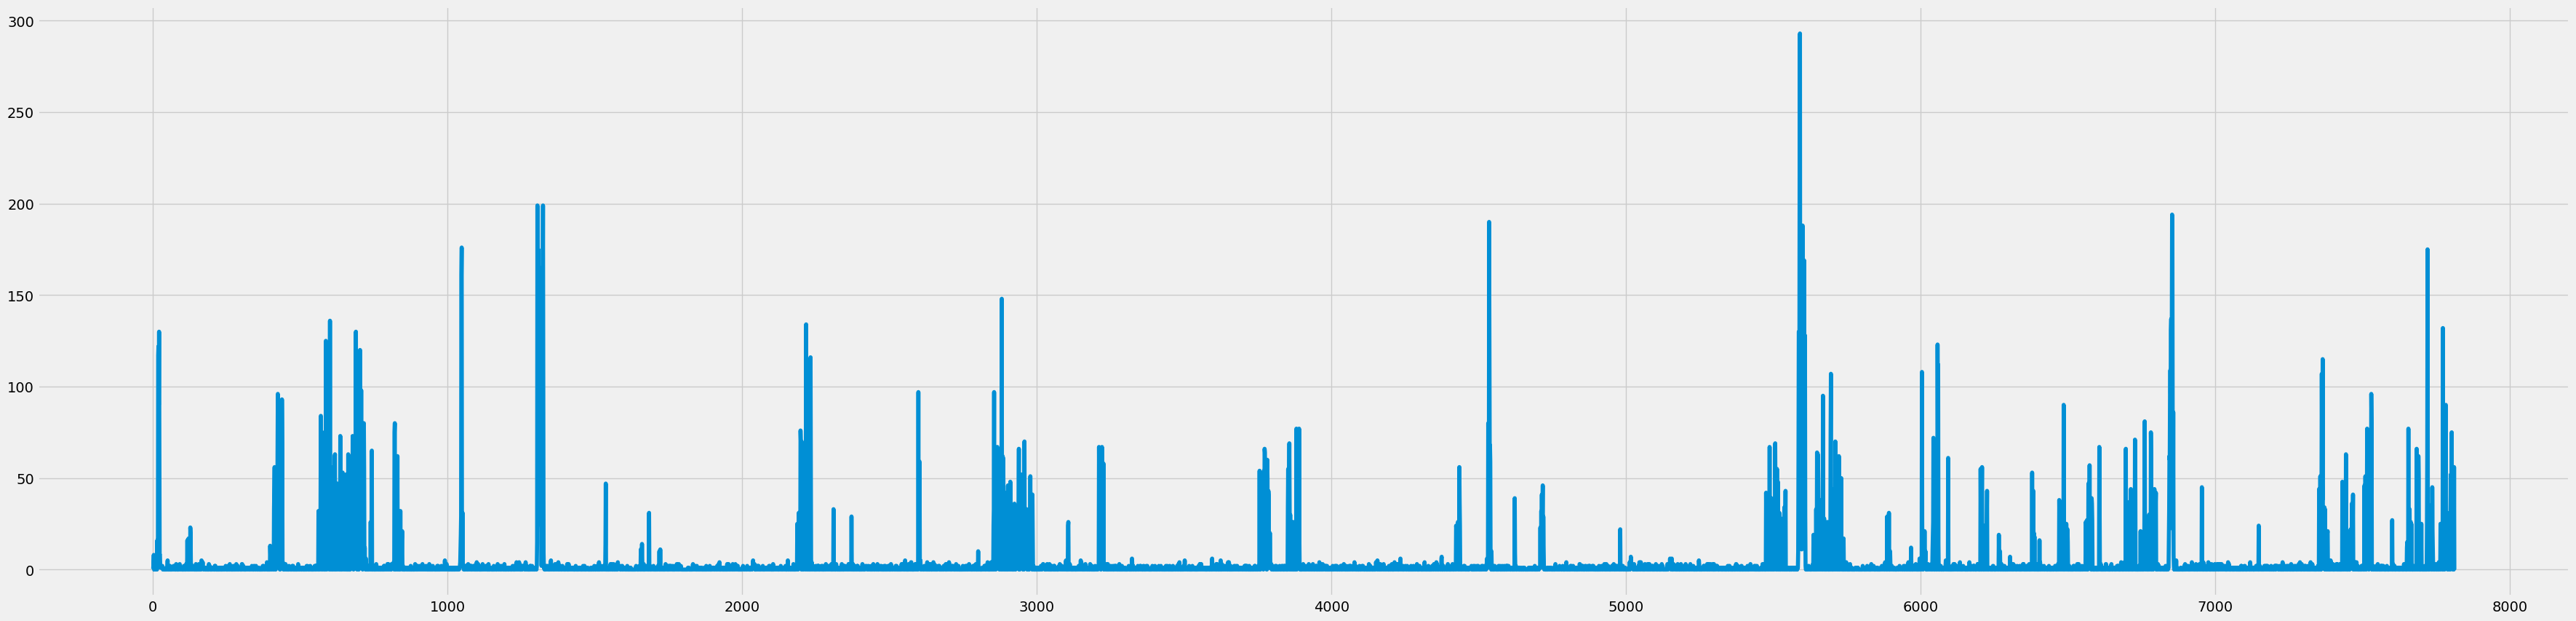

In [ ]:
fig = plt.figure(figsize=(40, 10))
ax = fig.add_subplot(111)
ax.plot(range(len(meth_bases)),meth_bases)
fig

In [ ]:
cpg.pos_adj.max()

8301855